In [1]:
import numpy as np
import os
import matplotlib
from pyevtk.hl import gridToVTK
import tables
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import glob
import pandas as pd

In [102]:
factor

0.027027027027027025

In [103]:
file = '/Users/eframe//Downloads/phantom_comp_05_250.h5'
f = tables.open_file(file, 'r')
src = f.root.image.read() 

f.close()
binsize = 1
X, Y, Z = np.mgrid[ -25:26:binsize, -16:17:binsize, -25:26:binsize ] 
sourcePixels = np.array( [ X.flatten(), Y.flatten(), Z.flatten() ] ).T + np.array([0,0,60])
data = src.copy()
data = data.copy().reshape(X.shape)
data = data.copy() 
data = np.fliplr( data )
data_ci = data[3:-3,:,3:-3]
data_ci.shape

(45, 33, 45)

0


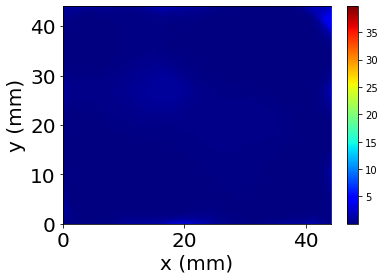

1


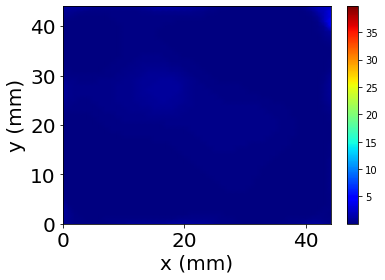

2


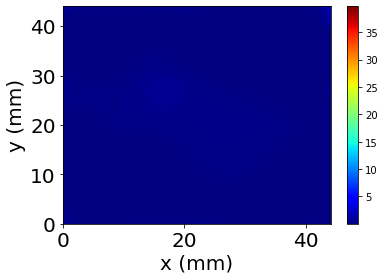

3


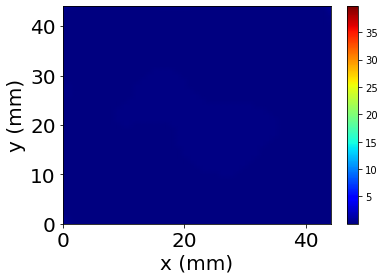

4


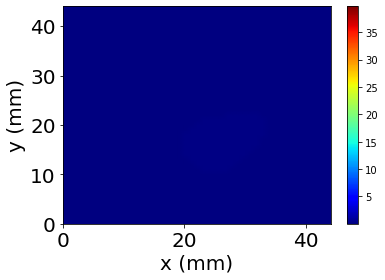

5


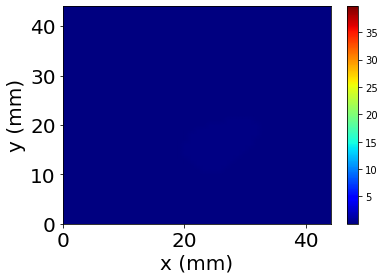

6


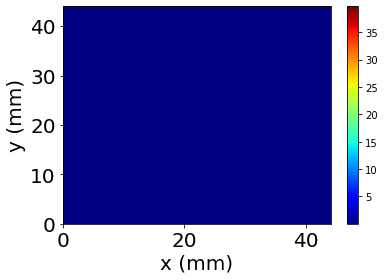

7


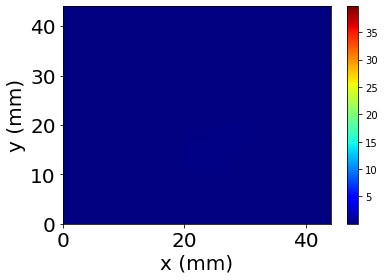

8


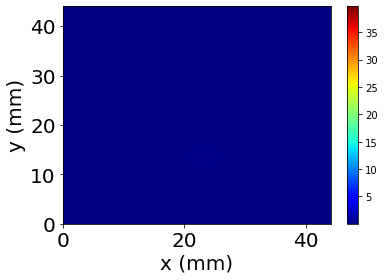

9


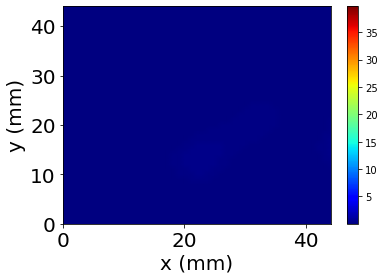

10


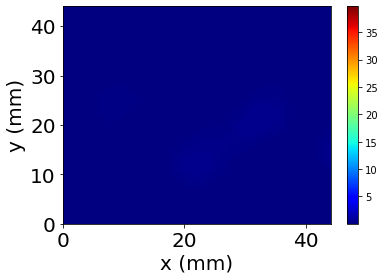

11


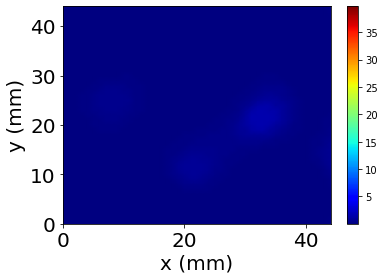

12


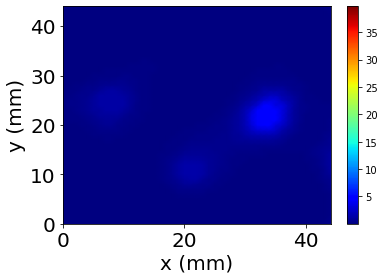

13


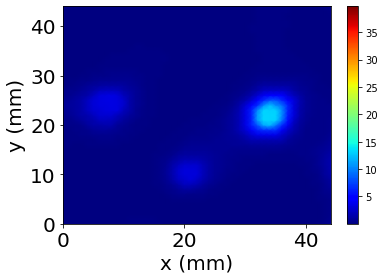

14


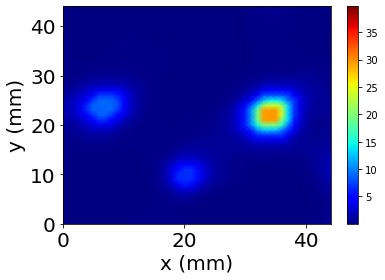

15


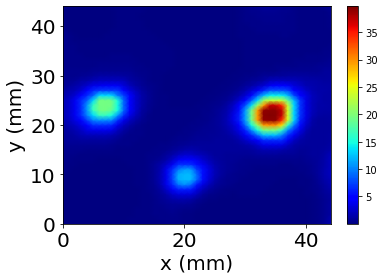

16


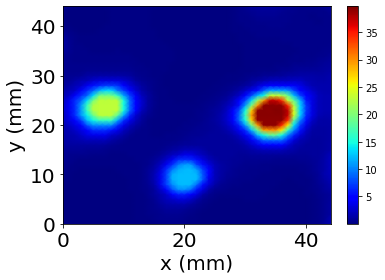

17


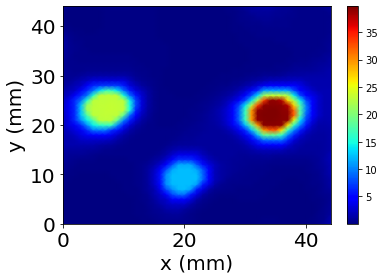

18


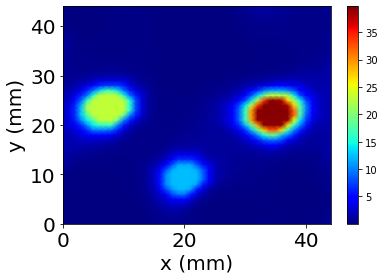

19


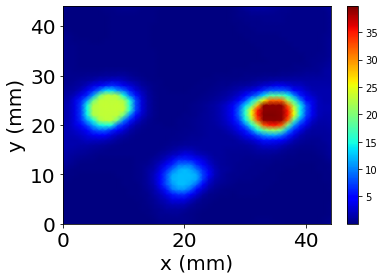

20


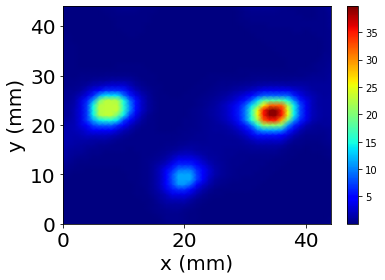

21


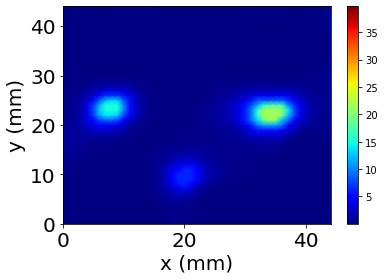

22


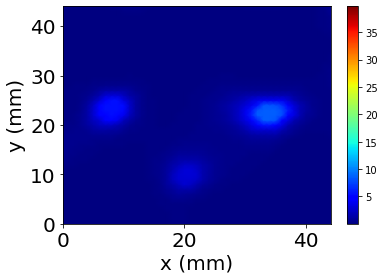

23


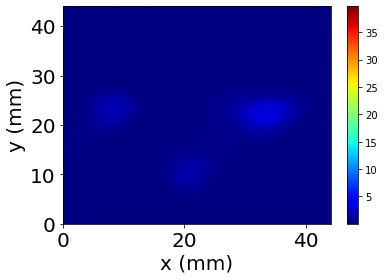

24


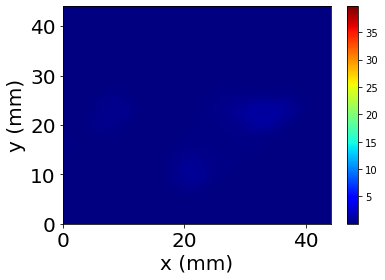

25


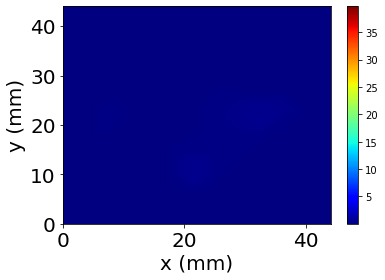

26


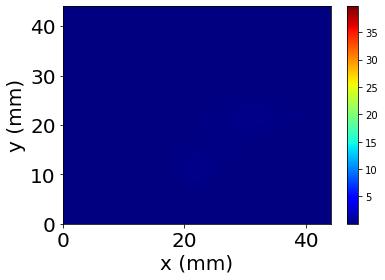

27


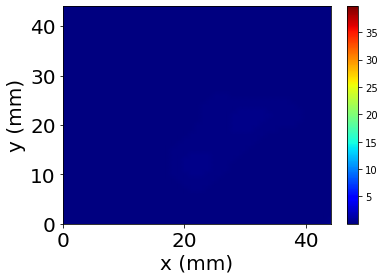

28


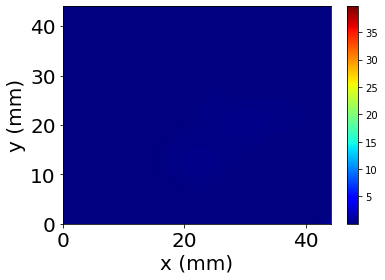

29


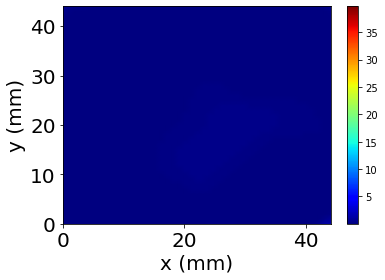

30


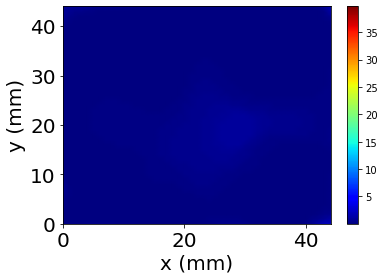

31


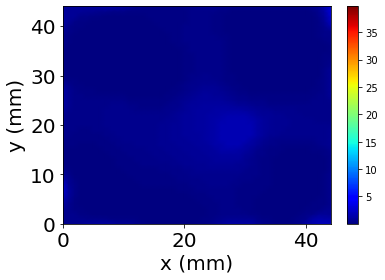

32


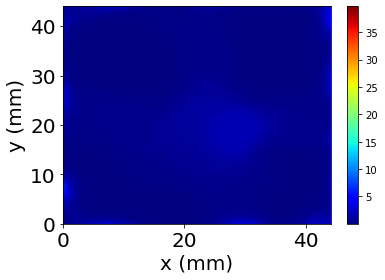

In [104]:
#Display Image 
%matplotlib inline
data2 = data_ci.copy()
a, b = min( data2.flatten() ), max( data2.flatten() )
for i in np.arange( data2.shape[1] ):
    fig, ax = plt.subplots()
    grid = data2[:,i,:]
    im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

16


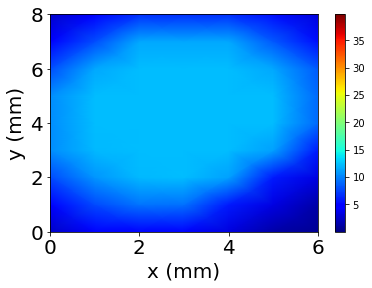

In [105]:
#Phanom Display Image 
%matplotlib inline

# Delta = 0.05
big_ci2 = data_ci[29:41,12:23,16:29].max(1)
med_ci2 = data_ci[2:13,14:23,19:29].max(1)
small_ci2 = data_ci[17:24,14:22,5:14].max(1)

big_ci = data_ci[29:41,12:23,16:29]
med_ci = data_ci[2:13,14:23,19:29]
small_ci = data_ci[17:24,14:22,5:14]

val = small_ci2.copy()
a, b = min( data_ci.flatten() ), max( data_ci.flatten() )
for i in np.arange( 16, 17 ):
    fig, ax = plt.subplots()
    grid = val
    im = ax.pcolormesh(  grid.T, vmin=a, vmax=b, cmap='jet', shading='gouraud') 
    ax.set_xlabel( 'x (mm)', fontsize = 20 )
    ax.set_ylabel( 'y (mm)', fontsize = 20 )
    ax.tick_params( labelsize = 20 )
    cbar = plt.colorbar( im )
    print(i)
    plt.show()

In [106]:
# Factors for Quantification Factor with Phantom and with Microsphere (CA)
total = np.sum(big_ci) + np.sum(med_ci) + np.sum(small_ci)
print(np.sum(big_ci), np.sum(med_ci), np.sum(small_ci) )
print(np.sum(big_ci)/total, np.sum(med_ci)/total, np.sum(small_ci)/total)

16538.3018253056 8142.473207376599 3098.551207388363
0.5953456783789726 0.29311269600309486 0.11154162561793264


In [107]:
2.28/total

8.207542473478681e-05